# **TRAITEMENT DE TEXTE SUIVIE D'ANALYSE TEXTUELLE:**

## **TRAITEMENT DE TEXTE**

### ***PRISE EN MAIN ET COMPREHENSION DU DATASETS***

In [ ]:
# Importation des modules
import pandas as pd

In [ ]:
import pandas as pd
import os

# Chemin du dossier contenant les datasets
folder_path = '/content/drive/MyDrive/TALENT VIRTUEL/DATA CLEANING/'

# Liste pour stocker les DataFrames de chaque fichier
dfs = []

# Parcourir tous les fichiers dans le dossier
for filename in os.listdir(folder_path):
    if filename.endswith('.csv'):  # Vérifier que le fichier est au format CSV
        file_path = os.path.join(folder_path, filename)
        df = pd.read_csv(file_path)  # Lire le fichier CSV
        dfs.append(df)  # Ajouter le DataFrame à la liste

# Concaténer tous les DataFrames en un seul
combined_df = pd.concat(dfs, ignore_index=True)

# Afficher le DataFrame combiné
df = combined_df


In [ ]:
# Vérifier s'il y a des textes dupliqués
df.duplicated(subset = ['Avis'], keep = 'last').value_counts()


False    5700
True      498
dtype: int64

**Nous avons belle et bien des textes dupliqués dans notre datasets. Ainsi nous allons pas les conserver; donc les éjecter**

In [ ]:
# Supprimer les doublons
df = df.drop_duplicates(subset = ['Avis'])
# Vérification
df.duplicated(subset = ['Avis'], keep = 'last').value_counts()

False    5700
dtype: int64

In [ ]:
# Voir la nouvelle dimension de nos données
df.shape

(5700, 3)

**Nos données sont de type (4199, 3) i.e 4199 lignes et 3 colonnes**

### ***Installation des dépendances de nltk***

In [ ]:
import nltk
nltk.download('punkt') # Dépendances nécessaires pour le tokenizer


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
#!pip install contractions # Installation de la bibliothèque pouvant identifier et gérer les contractions

In [ ]:
# Voir un peu à quoi ressembles les avis (la langue des avis ) dans notre datasets
df.head()

,Plateforme,Avis,Notes sur 5
0,Deel,Simple and useful tool!,4
1,Deel,Too slow,4
2,Deel,Payroll management,4
3,Deel,Deel Multiplies our Team,4
4,Deel,Great app and customer support,4


**STOPS WORDS : MOTS VIDES**

In [ ]:
# Biblitothèques pour gérer les mots vides
nltk.download('stopwords') # Télécharger l'ensemble des mots vides
from nltk.corpus import stopwords
stops_words = set(stopwords.words('english')) # Prendre les mots vides qui existent en anglais et les stockers dans la variable stops_words

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
# Voir à quoi ressemble notre stops_words
#stops_words

In [ ]:
# Combien de stops_words en anglais selon nltk
l_stops_words = len(stops_words)
print("Selon NLTK, nous avons en anglais ",l_stops_words, "mots vides")

Selon NLTK, nous avons en anglais  179 mots vides


**LEMMENTISATION**

In [ ]:
# Installation des dépendances
nltk.download('wordnet') # Accès à WordNet : Explorez les Synonymes et les Relations Sémantiques"
nltk.download('omw-1.4') # Traduction multilingue de notre espace word_net
nltk.download('averaged_perceptron_tagger') # POS modèle pré-entrainé pour l'analyse grammaticale

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [ ]:
# Définir une fonction qui convertit une liste en chaîne de caractères
def strg_list_to_list(strg_list):
  return strg_list.strip("[]").replace("'", "").replace('"', "").replace(",", "").split()

In [ ]:
#

### ***DEFINIR LES FONCTIONS DE PRETRAITEMENT DE TEXTES***

#### **PRE-TOKENISATION**

In [ ]:
df['Avis']

0                   Simple and useful tool!
1                                  Too slow
2                        Payroll management
3                  Deel Multiplies our Team
4            Great app and customer support
                       ...                 
5753                        Semester review
5754               Great must have platform
5755                      Do not use Oyster
5756    Amazing platform for remote workers
5757                Good Product, Not Great
Name: Avis, Length: 5700, dtype: object

**Pour la pré-tokenisation, nous allons:**


1.   Transformer les mots contractés en leurs formes initiales
2.   Supprimer les espaces supplémentaires
3.   Supprimer les séquences d'échappement
4.   Supprimer les mots vides





In [ ]:
!pip install contractions

In [ ]:
# Fonctions qui gèrent tout ce qui est traitement de nos texte
import re
import contractions

# Supprimer les séquences d'échapppement
def remove_escape_sequence(text):
  return re.sub(r'\n', '', text)
# Supprimer les espaces supplémentaires
def remove_extra_spaces(text):
  return re.sub(r"\s+", " ", text)
# Transformer les mots contractés en leurs formes initiales
def remove_contractions(text):
  return ' '.join([contractions.fix(word) for word in text.split()])
# Supprimer les mots vides
def remove_stopwords(text):
  return " ".join([word for word in text.split() if word not in stops_words])

########### Fonction de nettoyage de Pré tokenisation ##################

def pre_tokenisation_cleaning(text):
  text = remove_escape_sequence(text)
  text = remove_extra_spaces(text)
  text = remove_contractions(text)
  text = remove_stopwords(text)
  return text

###########################################################

In [ ]:
#Création d'une nouvelle colonne
df['pretoken'] = [pre_tokenisation_cleaning(sentence) for sentence in df['Avis']]
df.head()

<ipython-input-65-0c2ae21700c5>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['pretoken'] = [pre_tokenisation_cleaning(sentence) for sentence in df['Avis']]


,Plateforme,Avis,Notes sur 5,pretoken
0,Deel,Simple and useful tool!,4,Simple useful tool!
1,Deel,Too slow,4,Too slow
2,Deel,Payroll management,4,Payroll management
3,Deel,Deel Multiplies our Team,4,Deel Multiplies Team
4,Deel,Great app and customer support,4,Great app customer support


#### **TOKENISATION**

In [ ]:
# Fonction de tokenisation
def tokeniser(text):
  tokens = nltk.word_tokenize(text)
  return tokens

#### **NORMALISATION : STEMMING**

In [ ]:
# Fonction de normalisation en utilisant Stemmer
def stemming(unkn_input):
  porter = nltk.PorterStemmer() # Initialisation du PorterStemmer
  if (isinstance(unkn_input, list)):
    list_input=unkn_input
  if (isinstance(unkn_input, str)):
    list_input=  strg_list_to_list(unkn_input)
  list_stemmed = []
  for word in list_input:
    word = porter.stem(word)
    list_stemmed.append(word)
  return list_stemmed


#### **NORMALISATION : LEMMANTISATION**

In [ ]:
# Importation
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet

In [ ]:
# Normalisation des données en utilisant la Lemmantisation


# Initialisation
lemmatizer = WordNetLemmatizer()

# Fonction capable de reconnaître si correspond à un adverbe, nom, verbe, adjectif
def nltk_pos_tagger(nltk_tag):
  if nltk_tag.startswith('J'):
    return wordnet.ADJ
  elif nltk_tag.startswith('V'):
    return wordnet.VERB
  elif nltk_tag.startswith('N'):
    return wordnet.NOUN
  elif nltk_tag.startswith('R'):
    return wordnet.ADV
  else:
    return None


In [ ]:
# Lemmentisation
def lemmatize(unkn_input):
  if (isinstance(unkn_input, list)):
    list_input = unkn_input
  if (isinstance(unkn_input, str)):
    list_input = strg_list_to_list(unkn_input)
  list_sentence = [item.lower() for item in list_input]
  nltk_tagged = nltk.pos_tag(list_sentence)
  wordnet_tagged = map(lambda x: (x[0], nltk_pos_tagger(x[1])), nltk_tagged)

  lemmatized_sentence = []
  for word, tag in wordnet_tagged:
    if tag is None:
      lemmatized_sentence.append(word)
    else:
      lemmatized_sentence.append(lemmatizer.lemmatize(word, tag))
  return lemmatized_sentence


#### **POST TOKENISATION**

In [ ]:
from datetime import datetime
def remove_stopwords(list_tokens):
    stop_words = set(stopwords.words('english'))  # Charger les stopwords pour l'anglais
    filtered_tokens = [token for token in list_tokens if token.lower() not in stop_words]
    return filtered_tokens
def remove_specific_tokens(list_tokens):
    specific_tokens = ["n't", '``', "'s", "''"]
    filtered_tokens = [token for token in list_tokens if token not in specific_tokens]
    return filtered_tokens
def remove_punc(list_token):
    # Afficher la liste des tokens
    #print(list_token)

    def process(strg_token):
        strg_numb = '''0123456789'''
        strg_3dots = '...'
        strg_2dots = ".."
        strg_punc = '''!()+-[]{}|;:'"\,<>./?@#$£%^&*_~“”…‘’'''

        strg_output = ''

        if len(strg_token) == 0:  # Gestion des strings vides
            strg_output += ''
        else:
            if all(char in strg_numb for char in strg_token) or strg_token[0] in strg_numb:  # Si le caractère est un nombre
                strg_output += ''
            else:
                if len(strg_token) == 1 and strg_token in strg_punc:  # Si le caractère est une ponctuation
                    strg_output += ''
                else:
                    if strg_token[0] == '#':  # Si le caractère est un hashtag
                        strg_output += strg_token.lower()
                    elif strg_token == strg_3dots or strg_token == strg_2dots:
                        strg_output += ''
                    else:
                        strg_output += strg_token
        return strg_output

    list_output = [process(token) for token in list_token]
    return list_output

def remove_empty_item(list_item):
    if not list_item:  # Vérifier si la liste est vide
        return []  # Retourner une liste vide si la liste est vide

    token = [token for token in list_item if len(token) > 0]
    return token

def lowercase_alpha(list_token):
    return [token.lower() if (token.isalpha() or token[0] == '#') else token for token in list_token]

def posttokenization_cleaning(unkn_input):
    list_output = []

    if isinstance(unkn_input, list):
        list_output = unkn_input
    if isinstance(unkn_input, str):
        list_output = strg_list_to_list(unkn_input)

    list_output = remove_punc(list_output)
    list_output = remove_empty_item(list_output)
    list_output = lowercase_alpha(list_output)
    list_output = remove_stopwords(list_output)
    list_output = remove_specific_tokens(list_output)

     # Supprimer les tokens mentionnant le nom d'un mois
    list_output = [token for token in list_output if token.lower() not in ['january',
                                                                           'february', 'march', 'april', 'may', 'june', 'july', 'august',
                                                                           'september', 'october', 'november', 'december', '--','deel', "'ve",'remote',
                                                                           'rippling', 'oyester']]

    # Supprimer les tokens mentionnant des années spécifiques
    current_year = datetime.now().year
    years_to_remove = [str(year) for year in range(2020, current_year + 1)]
    list_output = [token for token in list_output if token.lower() not in years_to_remove]



    return list_output


### ***EXECUTER LES TACHES DE PRE-TRAITEMENT***

#### **PRE TOKENISATION**

In [ ]:
df.head()

,Plateforme,Avis,Notes sur 5,pretoken
0,Deel,Simple and useful tool!,4,Simple useful tool!
1,Deel,Too slow,4,Too slow
2,Deel,Payroll management,4,Payroll management
3,Deel,Deel Multiplies our Team,4,Deel Multiplies Team
4,Deel,Great app and customer support,4,Great app customer support


### ***STEMMING***

In [ ]:
df['stemmed'] = [stemming(tokeniser(sentence)) for sentence in df['pretoken']]
df.head()

<ipython-input-73-b228b7421554>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['stemmed'] = [stemming(tokeniser(sentence)) for sentence in df['pretoken']]


,Plateforme,Avis,Notes sur 5,pretoken,stemmed
0,Deel,Simple and useful tool!,4,Simple useful tool!,"[simpl, use, tool, !]"
1,Deel,Too slow,4,Too slow,"[too, slow]"
2,Deel,Payroll management,4,Payroll management,"[payrol, manag]"
3,Deel,Deel Multiplies our Team,4,Deel Multiplies Team,"[deel, multipli, team]"
4,Deel,Great app and customer support,4,Great app customer support,"[great, app, custom, support]"


### ***TOKENISATION***

In [ ]:
df['token'] = [tokeniser(sentence) for sentence in df['pretoken']]
df.head()

<ipython-input-74-8cc268e853db>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['token'] = [tokeniser(sentence) for sentence in df['pretoken']]


,Plateforme,Avis,Notes sur 5,pretoken,stemmed,token
0,Deel,Simple and useful tool!,4,Simple useful tool!,"[simpl, use, tool, !]","[Simple, useful, tool, !]"
1,Deel,Too slow,4,Too slow,"[too, slow]","[Too, slow]"
2,Deel,Payroll management,4,Payroll management,"[payrol, manag]","[Payroll, management]"
3,Deel,Deel Multiplies our Team,4,Deel Multiplies Team,"[deel, multipli, team]","[Deel, Multiplies, Team]"
4,Deel,Great app and customer support,4,Great app customer support,"[great, app, custom, support]","[Great, app, customer, support]"


### ***LEMMANTISATION***

In [ ]:
df['lemmentized'] = [lemmatize(tokeniser(sentence)) for sentence in df['Avis']]
df.head()

<ipython-input-75-77da78be1d52>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['lemmentized'] = [lemmatize(tokeniser(sentence)) for sentence in df['Avis']]


,Plateforme,Avis,Notes sur 5,pretoken,stemmed,token,lemmentized
0,Deel,Simple and useful tool!,4,Simple useful tool!,"[simpl, use, tool, !]","[Simple, useful, tool, !]","[simple, and, useful, tool, !]"
1,Deel,Too slow,4,Too slow,"[too, slow]","[Too, slow]","[too, slow]"
2,Deel,Payroll management,4,Payroll management,"[payrol, manag]","[Payroll, management]","[payroll, management]"
3,Deel,Deel Multiplies our Team,4,Deel Multiplies Team,"[deel, multipli, team]","[Deel, Multiplies, Team]","[deel, multiplies, our, team]"
4,Deel,Great app and customer support,4,Great app customer support,"[great, app, custom, support]","[Great, app, customer, support]","[great, app, and, customer, support]"


### ***NETTOYAGE: POST TOKENISATION***

In [ ]:
df['posttokenisation'] = df['lemmentized'].apply(posttokenization_cleaning)
df.head()

<ipython-input-76-142785ccc5f2>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['posttokenisation'] = df['lemmentized'].apply(posttokenization_cleaning)


,Plateforme,Avis,Notes sur 5,pretoken,stemmed,token,lemmentized,posttokenisation
0,Deel,Simple and useful tool!,4,Simple useful tool!,"[simpl, use, tool, !]","[Simple, useful, tool, !]","[simple, and, useful, tool, !]","[simple, useful, tool]"
1,Deel,Too slow,4,Too slow,"[too, slow]","[Too, slow]","[too, slow]",[slow]
2,Deel,Payroll management,4,Payroll management,"[payrol, manag]","[Payroll, management]","[payroll, management]","[payroll, management]"
3,Deel,Deel Multiplies our Team,4,Deel Multiplies Team,"[deel, multipli, team]","[Deel, Multiplies, Team]","[deel, multiplies, our, team]","[multiplies, team]"
4,Deel,Great app and customer support,4,Great app customer support,"[great, app, custom, support]","[Great, app, customer, support]","[great, app, and, customer, support]","[great, app, customer, support]"


## **ANALYSE TEXTUELLE**

### ***CLASSER LES AVIS SUIVANTS LE SENTIMENTS(NEGATIFS | NEUTRE | POSITIFS)***

In [ ]:
df.head()

,Plateforme,Avis,Notes sur 5,pretoken,stemmed,token,lemmentized,posttokenisation
0,Deel,Simple and useful tool!,4,Simple useful tool!,"[simpl, use, tool, !]","[Simple, useful, tool, !]","[simple, and, useful, tool, !]","[simple, useful, tool]"
1,Deel,Too slow,4,Too slow,"[too, slow]","[Too, slow]","[too, slow]",[slow]
2,Deel,Payroll management,4,Payroll management,"[payrol, manag]","[Payroll, management]","[payroll, management]","[payroll, management]"
3,Deel,Deel Multiplies our Team,4,Deel Multiplies Team,"[deel, multipli, team]","[Deel, Multiplies, Team]","[deel, multiplies, our, team]","[multiplies, team]"
4,Deel,Great app and customer support,4,Great app customer support,"[great, app, custom, support]","[Great, app, customer, support]","[great, app, and, customer, support]","[great, app, customer, support]"


In [ ]:
# Voir notre datasets avec les données notés sur 5
df_5 = df[df['Notes sur 5'] == 5]


In [ ]:
# Voir la dimension
df_5.shape

(4656, 8)

#### **FAIRE UN WORDCLOUD POUR VOIR LES MOTS FREQUENTS AFIN DE DEDUIRE LA CLASSE**

##### **NOTES SUR 5**

In [ ]:
# Installation des dépendances
#!pip install wordcloud matplotlib

In [ ]:
# Importation des bibliothèques
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [ ]:
# Comptez la fréquence des tokens dans la colonne 'Posttokenisation'
word_freq_5 = df_5['posttokenisation'].explode().value_counts().to_dict()
#word_freq_5

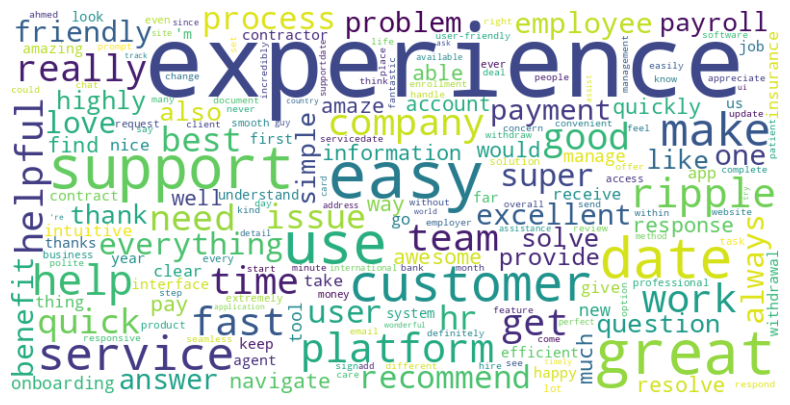

In [ ]:
# Créons le nuage de mots avec le dict
wordcloud = WordCloud(width = 800, height = 400, background_color = 'white').generate_from_frequencies(word_freq_5)
# Affichage des nuages de mots
plt.figure(figsize = (10, 5))
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.show()

**CONCLUSION:** Les avis notés sur 5 sont des avis positifs.

##### **NOTES SUR 4**

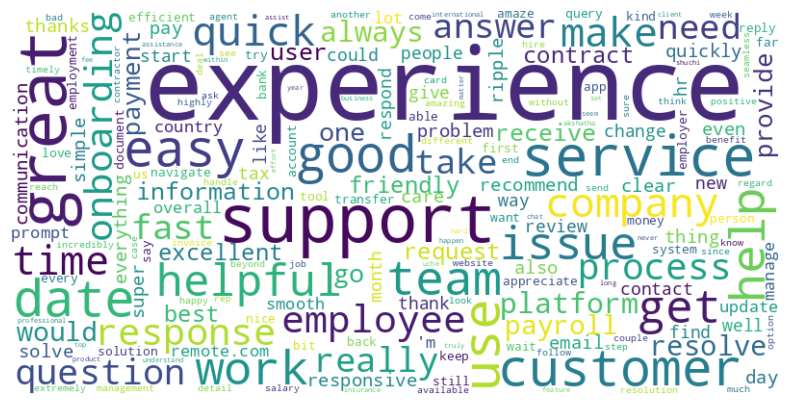

In [ ]:
# Voir notre datasets avec les données notés sur 4
df_4 = df[df['Notes sur 5'] == 4]
# Comptez la fréquence des tokens dans la colonne 'Posttokenisation'
word_freq_4 = df_4['posttokenisation'].explode().value_counts().to_dict()
# Créons le nuage de mots avec le dict
wordcloud = WordCloud(width = 800, height = 400, background_color = 'white').generate_from_frequencies(word_freq_4)
# Affichage des nuages de mots
plt.figure(figsize = (10, 5))
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.show()

##### **NOTES SUR 3**

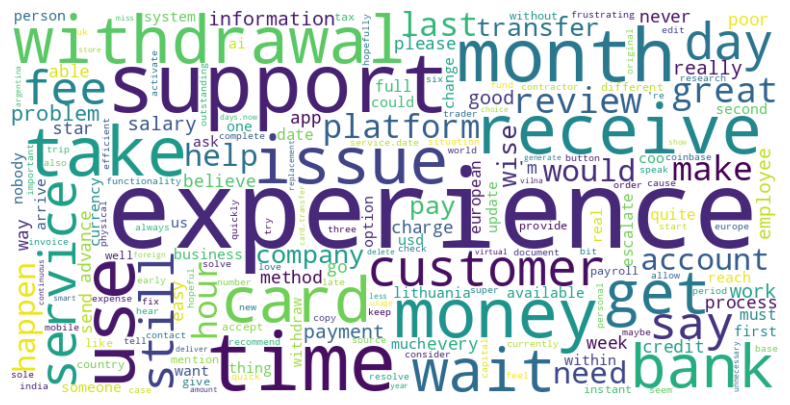

In [ ]:
# Voir notre datasets avec les données notés sur 3
df_3 = df[df['Notes sur 5'] == 3]
# Comptez la fréquence des tokens dans la colonne 'Posttokenisation'
word_freq_3 = df_3['posttokenisation'].explode().value_counts().to_dict()
# Créons le nuage de mots avec le dict
wordcloud = WordCloud(width = 800, height = 400, background_color = 'white').generate_from_frequencies(word_freq_3)
# Affichage des nuages de mots
plt.figure(figsize = (10, 5))
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.show()

##### **NOTES SUR 2**

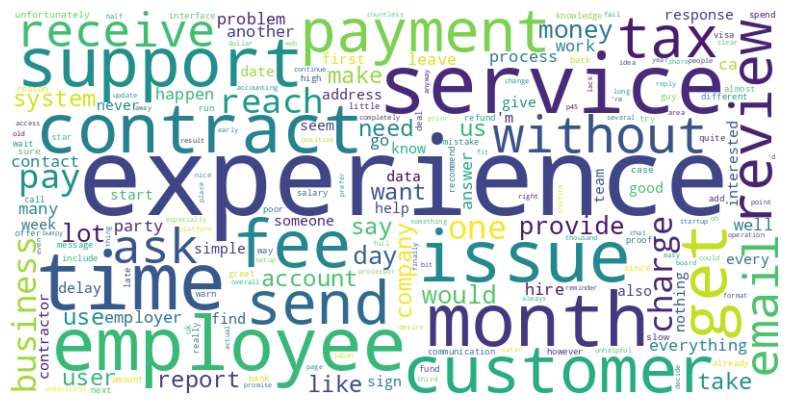

In [ ]:
# Voir notre datasets avec les données notés sur 2
df_2 = df[df['Notes sur 5'] == 2]
# Comptez la fréquence des tokens dans la colonne 'Posttokenisation'
word_freq_2 = df_2['posttokenisation'].explode().value_counts().to_dict()
# Créons le nuage de mots avec le dict
wordcloud = WordCloud(width = 800, height = 400, background_color = 'white').generate_from_frequencies(word_freq_2)
# Affichage des nuages de mots
plt.figure(figsize = (10, 5))
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.show()

##### **NOTES SUR 1**

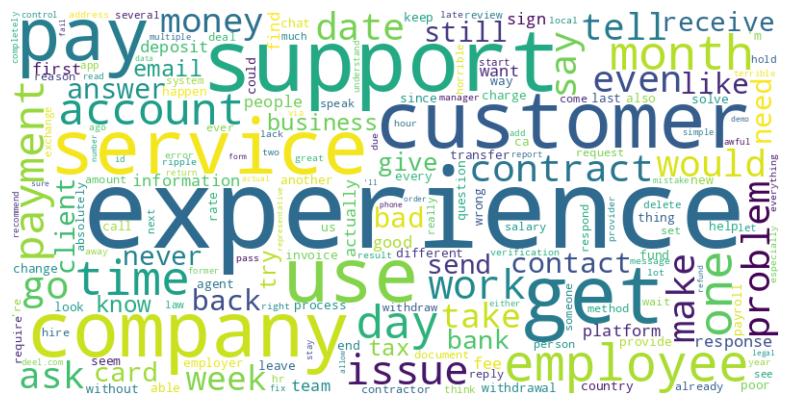

In [ ]:
# Voir notre datasets avec les données notés sur 1
df_1 = df[df['Notes sur 5'] == 1]
# Comptez la fréquence des tokens dans la colonne 'Posttokenisation'
word_freq_1 = df_1['posttokenisation'].explode().value_counts().to_dict()
# Créons le nuage de mots avec le dict
wordcloud = WordCloud(width = 800, height = 400, background_color = 'white').generate_from_frequencies(word_freq_1)
# Affichage des nuages de mots
plt.figure(figsize = (10, 5))
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.show()

##### **FONCTION DE CLASSIFICATION DES SENTIMENTS**

In [ ]:
def classify_sentiment(score):
  if score in [4, 5]:
    return 'positif'
  elif score == 3:
    return 'neutre'
  else:
    return 'negatif'
# Application
df['sentiment'] = df['Notes sur 5'].apply(classify_sentiment)


<ipython-input-88-897c447c2297>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sentiment'] = df['Notes sur 5'].apply(classify_sentiment)


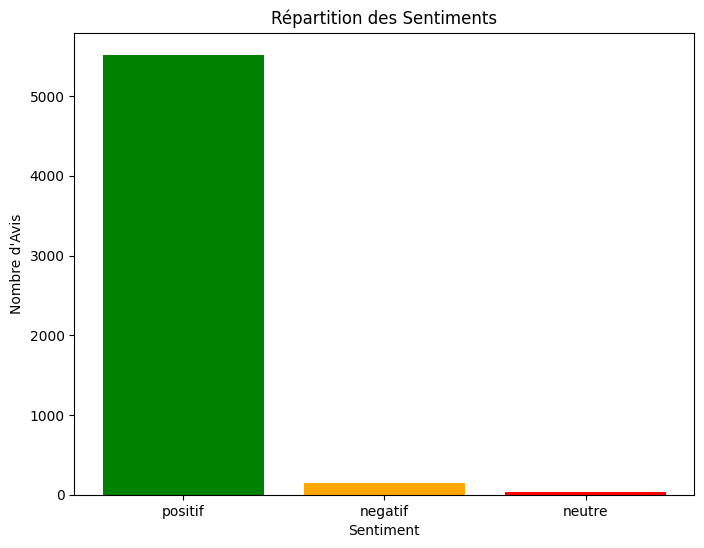

In [ ]:
import matplotlib.pyplot as plt

# Supposons que votre dataframe s'appelle df et la colonne 'sentiment' contient les classes de sentiments
# Création d'un dictionnaire pour compter le nombre d'occurrences de chaque classe de sentiment
sentiment_counts = df['sentiment'].value_counts()

# Extraire les labels et les valeurs pour l'histogramme
labels = sentiment_counts.index
values = sentiment_counts.values

# Créer un histogramme à partir des données
plt.figure(figsize=(8, 6))
plt.bar(labels, values, color=['green', 'orange', 'red'])

# Ajouter des titres et des étiquettes aux axes
plt.title('Répartition des Sentiments')
plt.xlabel('Sentiment')
plt.ylabel('Nombre d\'Avis')

# Afficher l'histogramme
plt.show()


In [ ]:
df.head()

,Plateforme,Avis,Notes sur 5,pretoken,stemmed,token,lemmentized,posttokenisation,sentiment
0,Deel,Simple and useful tool!,4,Simple useful tool!,"[simpl, use, tool, !]","[Simple, useful, tool, !]","[simple, and, useful, tool, !]","[simple, useful, tool]",positif
1,Deel,Too slow,4,Too slow,"[too, slow]","[Too, slow]","[too, slow]",[slow],positif
2,Deel,Payroll management,4,Payroll management,"[payrol, manag]","[Payroll, management]","[payroll, management]","[payroll, management]",positif
3,Deel,Deel Multiplies our Team,4,Deel Multiplies Team,"[deel, multipli, team]","[Deel, Multiplies, Team]","[deel, multiplies, our, team]","[multiplies, team]",positif
4,Deel,Great app and customer support,4,Great app customer support,"[great, app, custom, support]","[Great, app, customer, support]","[great, app, and, customer, support]","[great, app, customer, support]",positif


#### **ANALYSONS SUIVANT CHAQUE CLASSE LES AVIS DES UTILISATEURS**

##### **AVIS NEGATIFS**

In [ ]:
"""# Récupérer le datasets avec les avis negatifs
df_neg = df[df['sentiment'] == 'negatif']
# Comptez la fréquence des tokens dans la colonne 'Posttokenisation'
word_freq_neg = df_neg['posttokenisation'].explode().value_counts().to_dict()
# Créons le nuage de mots avec le dict
wordcloud = WordCloud(width = 800, height = 400, background_color = 'white').generate_from_frequencies(word_freq_neg)
# Obtenir les 10 premières valeurs du dictionnaire word_freq
top_values_neg = dict(sorted(word_freq_neg.items(), key=lambda x: x[1], reverse=True)[::])

# Affichage des nuages de mots
plt.figure(figsize = (10, 5))
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.show()
"""

"# Récupérer le datasets avec les avis negatifs\ndf_neg = df[df['sentiment'] == 'negatif']\n# Comptez la fréquence des tokens dans la colonne 'Posttokenisation'\nword_freq_neg = df_neg['posttokenisation'].explode().value_counts().to_dict()\n# Créons le nuage de mots avec le dict\nwordcloud = WordCloud(width = 800, height = 400, background_color = 'white').generate_from_frequencies(word_freq_neg)\n# Obtenir les 10 premières valeurs du dictionnaire word_freq\ntop_values_neg = dict(sorted(word_freq_neg.items(), key=lambda x: x[1], reverse=True)[::])\n\n# Affichage des nuages de mots\nplt.figure(figsize = (10, 5))\nplt.imshow(wordcloud, interpolation = 'bilinear')\nplt.axis('off')\nplt.show()\n"

In [ ]:
import nltk
from nltk.corpus import opinion_lexicon
nltk.download('opinion_lexicon')

[nltk_data] Downloading package opinion_lexicon to /root/nltk_data...
[nltk_data]   Package opinion_lexicon is already up-to-date!


True

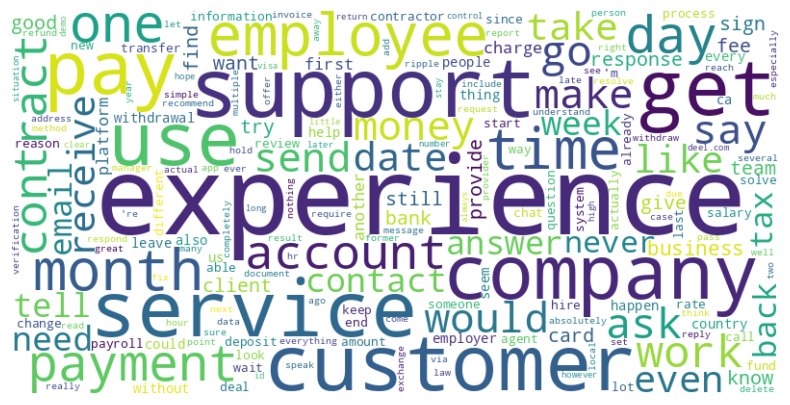

In [ ]:
# Accéder aux mots négatifs
neg_words = opinion_lexicon.negative()

# Récupérer le datasets avec les avis negatifs
df_neg = df[df['sentiment'] == 'negatif']

# Comptez la fréquence des tokens dans la colonne 'Posttokenisation'
word_freq_neg = df_neg['posttokenisation'].explode().value_counts().to_dict()

filtered_top_values_neg = {key: value for key, value in word_freq_neg.items() if key.lower() not in neg_words}
# Créons le nuage de mots avec le dict
wordcloud = WordCloud(width = 800, height = 400, background_color = 'white').generate_from_frequencies(filtered_top_values_neg)
# Affichage des nuages de mots
plt.figure(figsize = (10, 5))
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.show()


Les 20 premières valeurs du dictionnaire filtered_top_values_neg sont :
{'experience': 187, 'support': 96, 'service': 84, 'get': 83, 'customer': 82, 'company': 75, 'pay': 73, 'use': 72, 'employee': 72, 'time': 67, 'month': 66, 'one': 58, 'day': 54, 'payment': 52, 'account': 49, 'contract': 46, 'work': 43, 'go': 42, 'ask': 40, 'say': 39}


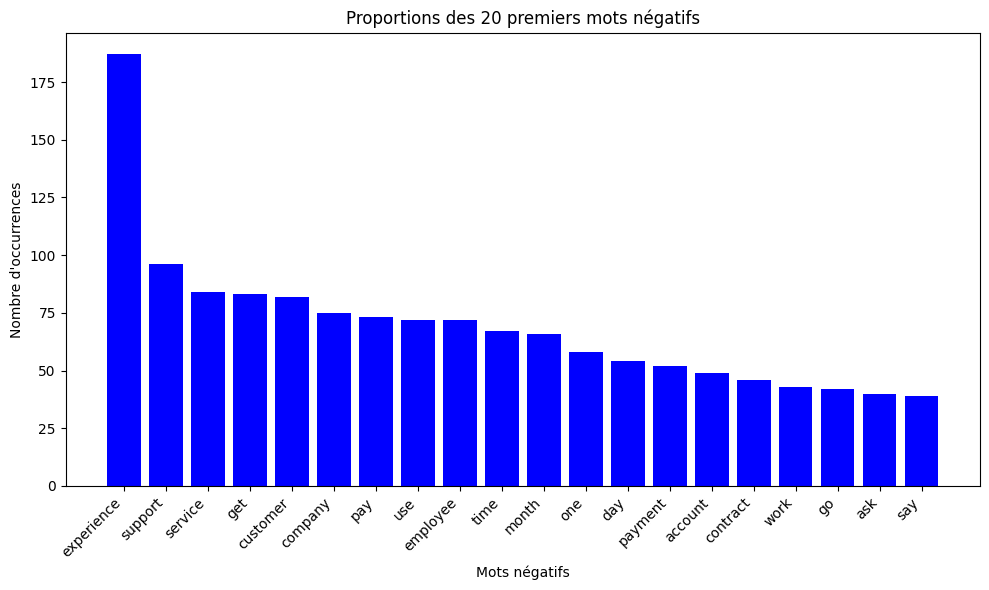

In [ ]:
import matplotlib.pyplot as plt

# Récupérer les 20 premières valeurs du dictionnaire
top_20_values = dict(sorted(filtered_top_values_neg.items(), key=lambda item: item[1], reverse=True)[:20])

# Afficher les 10 premières valeurs du dictionnaire
print("Les 20 premières valeurs du dictionnaire filtered_top_values_neg sont :")
print(top_20_values)

# Créer un histogramme à bandes pour visualiser les proportions
plt.figure(figsize=(10, 6))
plt.bar(top_20_values.keys(), top_20_values.values(), color='blue')
plt.xlabel('Mots négatifs')
plt.ylabel('Nombre d\'occurrences')
plt.title('Proportions des 20 premiers mots négatifs')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


In [ ]:
top_20_values

{'experience': 187,
 'support': 96,
 'service': 84,
 'get': 83,
 'customer': 82,
 'company': 75,
 'pay': 73,
 'use': 72,
 'employee': 72,
 'time': 67,
 'month': 66,
 'one': 58,
 'day': 54,
 'payment': 52,
 'account': 49,
 'contract': 46,
 'work': 43,
 'go': 42,
 'ask': 40,
 'say': 39}

##### **AVIS NEUTRE**

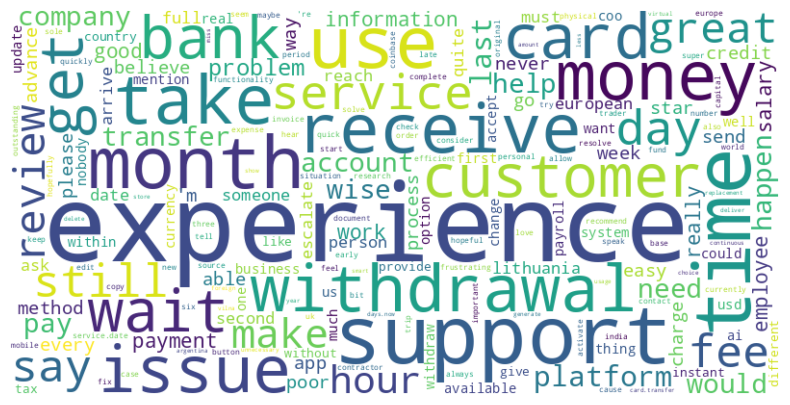

In [ ]:
# Récupérer le datasets avec les avis negatifs
df_neu = df[df['sentiment'] == 'neutre']
# Comptez la fréquence des tokens dans la colonne 'Posttokenisation'
word_freq_neu = df_neu['posttokenisation'].explode().value_counts().to_dict()
# Créons le nuage de mots avec le dict
wordcloud = WordCloud(width = 800, height = 400, background_color = 'white').generate_from_frequencies(word_freq_neu)
# Affichage des nuages de mots
plt.figure(figsize = (10, 5))
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.show()

Les 20 premières valeurs du dictionnaire filtered_top_values_neu sont :
{'experience': 36, 'support': 18, 'time': 17, 'use': 14, 'month': 14, 'money': 12, 'take': 12, 'receive': 12, 'withdrawal': 11, 'issue': 11, 'card': 10, 'get': 9, 'bank': 9, 'wait': 9, 'customer': 9, 'service': 9, 'day': 9, 'still': 8, 'fee': 8, 'say': 8}


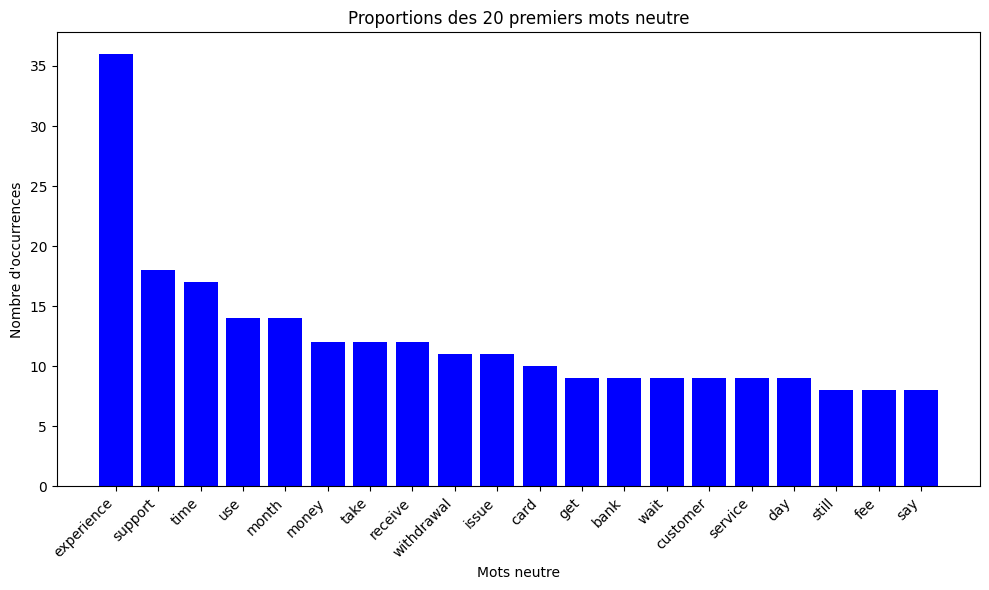

In [ ]:
import matplotlib.pyplot as plt

# Récupérer les 20 premières valeurs du dictionnaire
top_20_values = dict(sorted(word_freq_neu.items(), key=lambda item: item[1], reverse=True)[:20])

# Afficher les 10 premières valeurs du dictionnaire
print("Les 20 premières valeurs du dictionnaire filtered_top_values_neu sont :")
print(top_20_values)

# Créer un histogramme à bandes pour visualiser les proportions
plt.figure(figsize=(10, 6))
plt.bar(top_20_values.keys(), top_20_values.values(), color='blue')
plt.xlabel('Mots neutre')
plt.ylabel('Nombre d\'occurrences')
plt.title('Proportions des 20 premiers mots neutre')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


##### **AVIS POSITIFS**

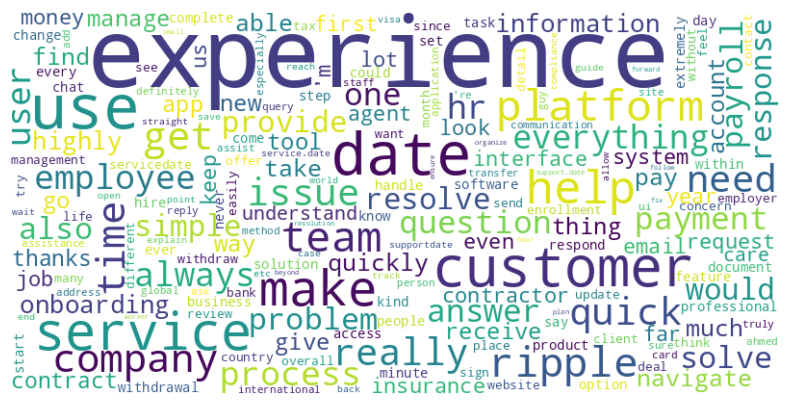

In [ ]:
# Accéder aux mots négatifs
pos_words = opinion_lexicon.positive()

# Récupérer le datasets avec les avis negatifs
df_pos = df[df['sentiment'] == 'positif']

# Comptez la fréquence des tokens dans la colonne 'Posttokenisation'
word_freq_pos = df_pos['posttokenisation'].explode().value_counts().to_dict()


filtered_top_values_pos = {key: value for key, value in word_freq_pos.items() if key.lower() not in pos_words}
# Créons le nuage de mots avec le dict
wordcloud = WordCloud(width = 800, height = 400, background_color = 'white').generate_from_frequencies(filtered_top_values_pos)
# Affichage des nuages de mots
plt.figure(figsize = (10, 5))
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.show()


Les 20 premières valeurs du dictionnaire filtered_top_values_pos sont :
{'experience': 5711, 'use': 1359, 'date': 1274, 'customer': 1095, 'service': 970, 'make': 863, 'help': 773, 'platform': 669, 'team': 643, 'ripple': 625, 'get': 580, 'time': 570, 'company': 562, 'really': 518, 'quick': 510, 'issue': 508, 'need': 506, 'process': 403, 'hr': 395, 'always': 392}


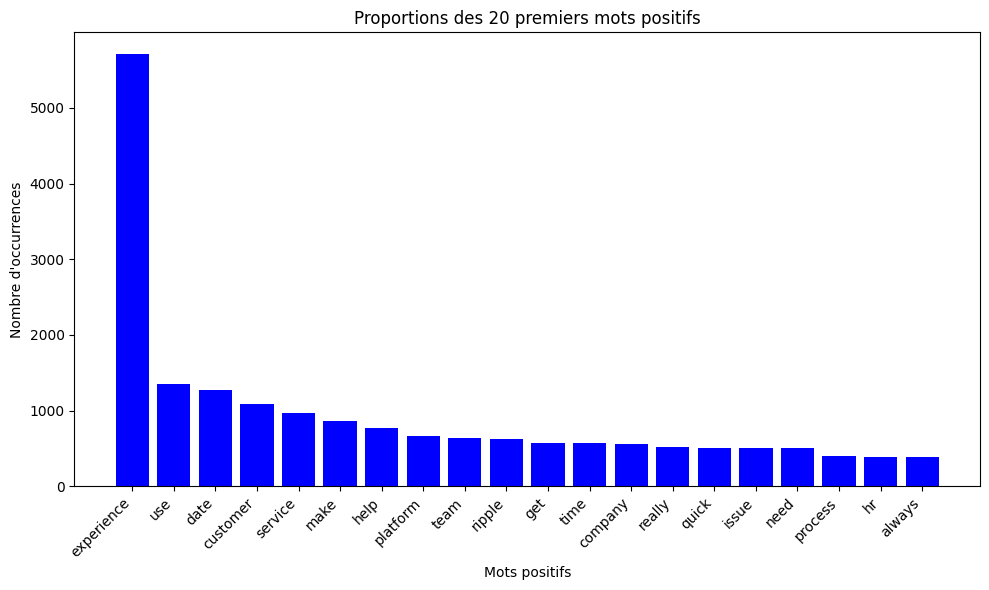

In [ ]:
import matplotlib.pyplot as plt

# Récupérer les 20 premières valeurs du dictionnaire
top_20_values = dict(sorted(filtered_top_values_pos.items(), key=lambda item: item[1], reverse=True)[:20])

# Afficher les 10 premières valeurs du dictionnaire
print("Les 20 premières valeurs du dictionnaire filtered_top_values_pos sont :")
print(top_20_values)

# Créer un histogramme à bandes pour visualiser les proportions
plt.figure(figsize=(10, 6))
plt.bar(top_20_values.keys(), top_20_values.values(), color='blue')
plt.xlabel('Mots positifs')
plt.ylabel('Nombre d\'occurrences')
plt.title('Proportions des 20 premiers mots positifs')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()
